In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/Users/Luisa/.pyenv/versions/3.7.12/envs/BDL-A1/lib/python3.7/site-packages/pandas/compat/__init__.py:124: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [5]:
df = pd.read_parquet('../data/final_dataset_v2.parquet')
df.head()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,Number of ICU Beds By County,Number of ICU Beds Available By County,Total Beds By County per thousand ppl,Number of ICU Beds By County per thousand ppl,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline
0,0,Albany,2020-03-26,171,0.000543,0,0.000000,314848,0.0,0.0,...,80.0,43.0,3.795482,0.254091,-51.0,-11.0,43.0,-53.0,-55.0,23.0
1,110535,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
2,110536,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
3,110537,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0
4,110538,Suffolk,2020-03-26,2735,0.001794,22,0.000014,1524665,0.0,0.0,...,309.0,68.0,1.737431,0.202667,-44.0,-14.0,122.0,-63.0,-53.0,24.0


In [13]:
print(df.columns)

Index(['index', 'county', 'date', 'daily_cases', 'daily_cases_by_population',
       'daily_deaths', 'daily_deaths_by_population', 'POP2020',
       'Partially Vaccinated', 'Fully Vaccinated', 'Non Vaccinated',
       'Partially Vaccinated per Population',
       'Fully Vaccinated per Population', 'Non Vaccinated per Population',
       'Facility Name', 'Patients Age 55 to 64 Years',
       'Patients Age 65 to 74 Years', 'Patients Age 75 to 84 Years',
       'Patients Currently Hospitalized', 'Patients Newly Admitted',
       'Patients Positive After Admission', 'Patients Currently in ICU',
       'Patients Currently ICU Intubated', 'Total Beds',
       'Number of Beds Available', 'Number of ICU Beds',
       'Number of ICU Beds Available', 'Total Beds By County',
       'Number of Beds Available By County', 'Number of ICU Beds By County',
       'Number of ICU Beds Available By County',
       'Total Beds By County per thousand ppl',
       'Number of ICU Beds By County per thousand p

In [5]:
#df.describe().T

In [4]:
# df_sorted = df.sort_values(by=['Facility Name','date']).set_index(['Facility Name','date'])
subset = df.copy()
subset['overload'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

In [5]:
# Analyse Overload
print(subset['overload'].describe())
subset[subset['overload'] <= 0]['overload'].count()

count    133760.000000
mean         64.853805
std          69.265370
min        -100.000000
25%          16.000000
50%          44.000000
75%          89.000000
max         775.000000
Name: overload, dtype: float64


7100

In [110]:
subset[subset['Facility Name'] == 'NYU LANGONE HEALTH-COBBLE HILL' ].describe().T

,count,mean,std,min,25%,50%,75%,max
index,704.0,6.478200e+04,1.057532e+04,4.650400e+04,5.564300e+04,6.478200e+04,7.392100e+04,8.306000e+04
daily_cases,704.0,7.599391e+05,5.592390e+05,2.139300e+04,2.419098e+05,7.717020e+05,1.041847e+06,2.290565e+06
daily_cases_by_population,704.0,8.631562e-02,6.351964e-02,2.429866e-03,2.747666e-02,8.765167e-02,1.183354e-01,2.601676e-01
daily_deaths,704.0,2.834904e+04,7.241828e+03,7.000000e+02,2.375375e+04,3.005000e+04,3.384825e+04,3.978200e+04
daily_deaths_by_population,704.0,3.219949e-03,8.225434e-04,7.950760e-05,2.698005e-03,3.413148e-03,3.844562e-03,4.518530e-03
POP2020,704.0,8.804190e+06,0.000000e+00,8.804190e+06,8.804190e+06,8.804190e+06,8.804190e+06,8.804190e+06
Partially Vaccinated,704.0,2.721984e+06,2.815571e+06,0.000000e+00,0.000000e+00,1.527298e+06,5.573240e+06,7.289304e+06
Fully Vaccinated,704.0,2.340871e+06,2.543334e+06,0.000000e+00,0.000000e+00,7.388910e+05,4.982855e+06,6.472739e+06
Non Vaccinated,704.0,2.793141e+06,2.856889e+06,0.000000e+00,0.000000e+00,2.291124e+06,4.383274e+06,8.804142e+06
Partially Vaccinated per Population,704.0,3.091692e-01,3.197990e-01,0.000000e+00,0.000000e+00,1.734739e-01,6.330214e-01,8.279358e-01


In [14]:
data = subset.groupby(['date']).sum()['overload']
# plt.plot(subset['date'], subset['overload'])

# plt.show()

<AxesSubplot:xlabel='date'>

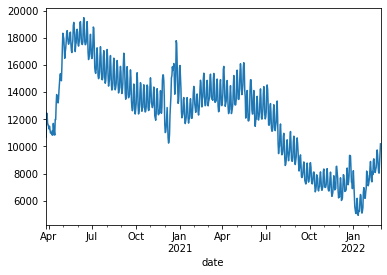

In [16]:
data.plot()

In [28]:
hospital_count = len(subset.groupby('Facility Name'))
print(f'Total Number of Hospitals: {hospital_count}')

data_overload = subset[subset['overload'] <= 0]
hospital_overload_count = len(data_overload.groupby('Facility Name').count()['overload'])
print(f'Hospitals that were overloaded for at least 1 day: {hospital_overload_count}')

Total Number of Hospitals: 190
Hospitals that were overloaded for at least 1 day: 140


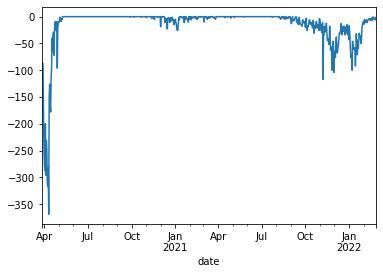

In [30]:
data = data_overload.groupby(['date']).sum()['overload'].plot()

In [40]:
subset['bed_overload_ICU'] = subset['Patients Currently in ICU']  / subset['Number of ICU Beds']
subset.replace([np.inf, -np.inf], np.nan, inplace=True)

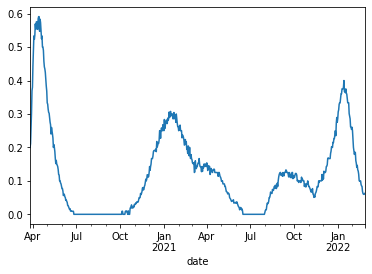

In [69]:
data = subset.groupby(['date']).median()['bed_overload_ICU'].plot()

{'whiskers': [<matplotlib.lines.Line2D at 0x116d83410>,
 'caps': [<matplotlib.lines.Line2D at 0x116d83450>,
 'boxes': [<matplotlib.lines.Line2D at 0x116da63d0>],
 'medians': [<matplotlib.lines.Line2D at 0x116e09b10>],
 'fliers': [<matplotlib.lines.Line2D at 0x116e09150>],
 'means': []}

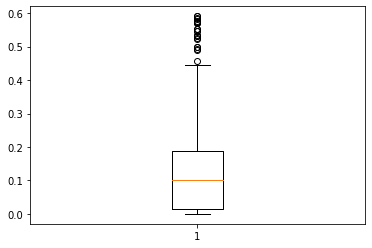

In [71]:
plt.boxplot(subset.groupby(['date']).median()['bed_overload_ICU'].values)

In [43]:
subset['bed_overload_ICU'].describe()

count    107740.000000
mean          0.153857
std           0.251219
min           0.000000
25%           0.000000
50%           0.083333
75%           0.226190
max          50.000000
Name: bed_overload_ICU, dtype: float64

In [38]:
subset['Number of ICU Beds'].describe()

count    133760.000000
mean         30.062007
std          39.591224
min           0.000000
25%           6.000000
50%          16.000000
75%          38.000000
max         340.000000
Name: Number of ICU Beds, dtype: float64

In [39]:
subset['Patients Currently in ICU'].describe()

count    133760.000000
mean          4.415999
std          11.263465
min           0.000000
25%           0.000000
50%           1.000000
75%           4.000000
max         254.000000
Name: Patients Currently in ICU, dtype: float64

In [45]:
subset['bed_overload'] = subset['Patients Currently Hospitalized']  / subset['Total Beds']
subset.replace([np.inf, -np.inf], np.nan, inplace=True)

In [104]:
subset[subset['Total Beds'] == 0].groupby('Facility Name').count()

,index,county,date,daily_cases,daily_cases_by_population,daily_deaths,daily_deaths_by_population,POP2020,Partially Vaccinated,Fully Vaccinated,...,retail_and_recreation_percent_change_from_baseline,grocery_and_pharmacy_percent_change_from_baseline,parks_percent_change_from_baseline,transit_stations_percent_change_from_baseline,workplaces_percent_change_from_baseline,residential_percent_change_from_baseline,overload,bed_overload_ICU,bed_overload,overloaded_status
Facility Name,,,,,,,,,,,,,,,,,,,,,
DEGRAFF MEMORIAL HOSPITAL,703,703,703,703,703,703,703,703,703,703,...,703,703,703,703,703,703,703,0,0,703
HELEN HAYES HOSPITAL,55,55,55,55,55,55,55,55,55,55,...,55,55,55,55,55,55,55,0,0,55
JOHN R. OISHEI CHILDRENS HOSPITAL,133,133,133,133,133,133,133,133,133,133,...,133,133,133,133,133,133,133,0,0,133
KINGSBROOK JEWISH MEDICAL CENTER,242,242,242,242,242,242,242,242,242,242,...,242,242,242,242,242,242,242,0,0,242
LENOX HEALTH GREENWICH VILLAGE,284,284,284,284,284,284,284,284,284,284,...,284,284,284,284,284,284,284,0,0,284
MONTEFIORE MEDICAL CENTER - MONTEFIORE WESTCHESTER SQUARE,704,704,704,704,704,704,704,704,704,704,...,704,704,704,704,704,704,704,0,0,704
NYU LANGONE HEALTH-COBBLE HILL,704,704,704,704,704,704,704,704,704,704,...,704,704,704,704,704,704,704,0,0,704
ST JOSEPHS MEDICAL CENTER,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,0,0,1
ST MARYS HEALTHCARE - AMSTERDAM MEMORIAL CAMPUS,192,192,192,192,192,192,192,192,192,192,...,192,192,192,192,192,192,192,0,0,192


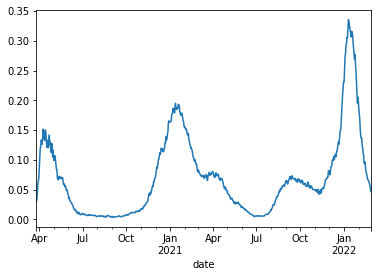

In [47]:
data = subset.groupby(['date']).median()['bed_overload'].plot()

In [58]:
data = subset.groupby(['date']).median()['bed_overload']

In [63]:
data.describe()

count    704.000000
mean       0.070218
std        0.067852
min        0.003665
25%        0.013471
50%        0.056596
75%        0.099029
max        0.335616
Name: bed_overload, dtype: float64

In [66]:
df2 = pd.DataFrame(data.values, columns=['Median'])

<AxesSubplot:>

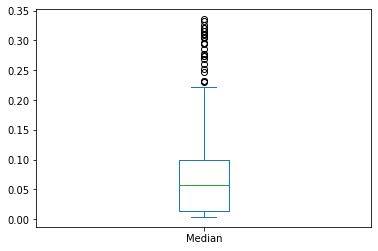

In [68]:
df2.plot.box()

In [76]:
subset['overloaded_status'] =  subset['bed_overload'] > 0.10
overloaded = subset[subset['overloaded_status'] == True]
no_overload = subset[subset['overloaded_status'] == False]

In [100]:
subset.isnull().sum()

index                                                     0
county                                                    0
date                                                      0
daily_cases                                               0
daily_cases_by_population                                 0
daily_deaths                                              0
daily_deaths_by_population                                0
POP2020                                                   0
Partially Vaccinated                                      0
Fully Vaccinated                                          0
Non Vaccinated                                            0
Partially Vaccinated per Population                       0
Fully Vaccinated per Population                           0
Non Vaccinated per Population                             0
Facility Name                                             0
Patients Age 55 to 64 Years                               0
Patients Age 65 to 74 Years             

In [91]:
od = overloaded.groupby('Facility Name').count()['overloaded_status']
nod = no_overload.groupby('Facility Name').count()['overloaded_status']
new_df = pd.DataFrame({'overloaded days': od, 'no overloaded days': nod},).reset_index()

In [92]:
new_df['overloaded total'] = new_df['overloaded days'] / (new_df['overloaded days']  + new_df['no overloaded days'] )

In [93]:
new_df

,Facility Name,overloaded days,no overloaded days,overloaded total
0,A.O. FOX MEMORIAL HOSPITAL,247.0,457,0.350852
1,ADIRONDACK MEDICAL CENTER - SARANAC LAKE SITE,104.0,600,0.147727
2,ALBANY MEDICAL CENTER HOSPITAL,125.0,579,0.177557
3,ARNOT OGDEN MEDICAL CENTER,309.0,395,0.438920
4,AUBURN MEMORIAL HOSPITAL,198.0,506,0.281250
...,...,...,...,...
185,WHITE PLAINS HOSPITAL CENTER,249.0,455,0.353693
186,WINIFRED MASTERSON BURKE REHABILITATION HOSPITAL,212.0,492,0.301136
187,WOODHULL MEDICAL AND MENTAL HEALTH CENTER,263.0,441,0.373580
188,WYCKOFF HEIGHTS MEDICAL CENTER,290.0,414,0.411932


In [94]:
new_df['overloaded total'].describe()

count    179.000000
mean       0.299137
std        0.106389
min        0.007102
25%        0.240767
50%        0.311080
75%        0.371449
max        0.551136
Name: overloaded total, dtype: float64

In [95]:
new_df['overloaded total'].sort_values()

17     0.007102
142    0.024148
132    0.025568
51     0.041193
29     0.044034
         ...   
116         NaN
160         NaN
166         NaN
172         NaN
179         NaN
Name: overloaded total, Length: 190, dtype: float64

In [122]:
len(df[df['Total Beds'] == 0])
i =  df.groupby('Facility Name').min()['Total Beds']

In [141]:
x = i[i == 0]

In [142]:
problem_hospt = x.index.tolist()

In [147]:
for a in problem_hospt:
    t = df[df['Facility Name'] == a]
    print(a, t.shape[0], t[t['Total Beds'] == 0].shape[0])

DEGRAFF MEMORIAL HOSPITAL 704 703
HELEN HAYES HOSPITAL 704 55
JOHN R. OISHEI CHILDRENS HOSPITAL 704 133
KINGSBROOK JEWISH MEDICAL CENTER 704 242
LENOX HEALTH GREENWICH VILLAGE 704 284
MONTEFIORE MEDICAL CENTER - MONTEFIORE WESTCHESTER SQUARE 704 704
NYU LANGONE HEALTH-COBBLE HILL 704 704
ST JOSEPHS MEDICAL CENTER 704 1
ST MARYS HEALTHCARE - AMSTERDAM MEMORIAL CAMPUS 704 192
ST. JOSEPHS HOSPITAL 704 288
SYOSSET HOSPITAL 704 7
THE UNITY HOSPITAL OF ROCHESTER - ST MARYS CAMPUS 704 100
UNITED MEMORIAL MEDICAL CENTER BANK STREET CAMPUS 704 100
UNIVERSITY OF VERMONT HEALTH NETWORK - ELIZABETHTOWN COMMUNITY HOSP 704 702


In [148]:
df[df['Facility Name'] == 'THE UNITY HOSPITAL OF ROCHESTER - ST MARYS CAMPUS']['Total Beds'].min()

0.0

In [90]:
new_df.columns

Index(['overloaded days', 'no overloaded days', 'overloaded total'], dtype='object')

In [ ]:
# Aggregate Analysis of the model
# Get error and accuracy for each hospital
# Plot box plot of the distribution of all errors
# Which are the worse and best and why? ( what do these hospitals have in common)

# Conclusion and further analysis
# Which hospitals have been the most affected historically?
#  - Get the percentage of days a hospital was in overloaded state
#  - Hospitals with most days overloaded
#  - Plot in map those hospitals (assign a color)

# Which hospitals will be impacted in the next X days based on our model
#  - Get the percentage of days a hospital was in overloaded state
#  - Hospitals with most days overloaded
#  - Plot in map those hospitals (assign a color)

In [9]:
# Here is the historical analysis of overload
subset = df.copy()
subset['overload_count'] = subset['Number of Beds Available'] + \
    subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

In [ ]:
# subset = df.copy()
# cutoff = 0.30
# subset['overload_perc']
# subset['overload_class'] = subset['Number of Beds Available'] + \
#     subset['Number of ICU Beds Available'] - subset['Patients Newly Admitted']

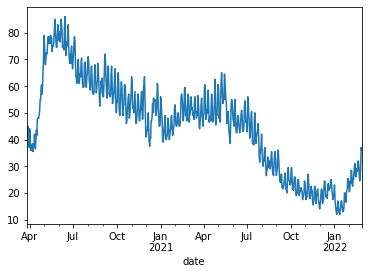

In [10]:
data = subset.groupby(['date']).median()['overload_count'].plot()

<AxesSubplot:xlabel='date'>

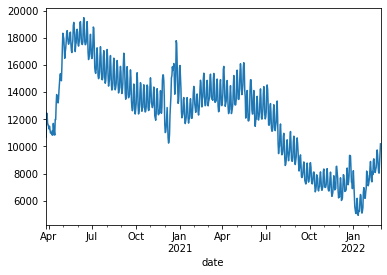

In [13]:
subset.groupby(['date']).sum()['overload_count'].plot()